In [ ]:
import torch
import torchvision
%matplotlib notebook
import numpy as np
%matplotlib inline
labels_map = ['T-shirt/top',  'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
         'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# torchvision.transforms.ToTensor() converts different types of data to tensor, so we can use torch
train_dataset = torchvision.datasets.FashionMNIST("./FashionMNIST",download=True,train=True,transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.FashionMNIST("./FashionMNIST",download=True,train=False,transform=torchvision.transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 11782150.23it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 170681.64it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3156614.75it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8114346.86it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



# Loading Data

In [ ]:
print("Train Dataset Size: ", len(train_dataset))
print("Test Dataset Size: ", len(test_dataset))

Train Dataset Size:  60000
Test Dataset Size:  10000


In [ ]:
image,label = train_dataset[0]
image.shape


torch.Size([1, 28, 28])

In [ ]:
trainDataLoader = torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(test_dataset,batch_size=64,shuffle=True)

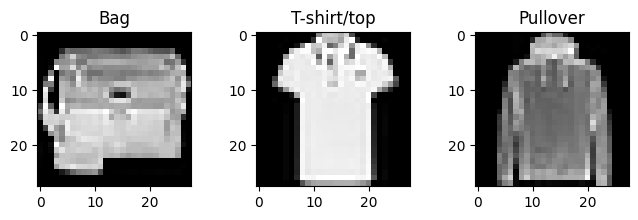

In [ ]:
images, labels = next(iter(trainDataLoader))
plt.figure(figsize=(8,2))
for index in np.arange(1,4):
  plt.subplot(1,3,index)
  plt.imshow(images[index].squeeze().numpy(),cmap=plt.cm.gray)
  plt.title(labels_map[labels[index]])

In [ ]:
# Creating the model structure
class LinearReg(torch.nn.Module):
  def __init__(self):
    super(LinearReg,self).__init__()
    self.linear = torch.nn.Linear(28*28,10);

  # Forward Pass
  def forward(self,x):
    x = x.view(-1,28*28)
    transformed_x = self.linear(x)
    return transformed_x

net = LinearReg().cuda()

# Loss Function
Loss = torch.nn.CrossEntropyLoss()
# Optimizer
optimizer = torch.optim.SGD(net.parameters(),lr=0.01);

In [ ]:
train_loss_history = []
test_loss_history = []

for epoch in range(25):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    prediction_output = net.forward(images)
    fit = Loss(prediction_output,labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      prediction_output = net.forward(images)
      fit = Loss(prediction_output,labels)
      test_loss += fit.item()

  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)

  print("Epoch: %s, Train Loss: %s, Test Loss: %s"%(epoch,train_loss,test_loss))

Epoch: 0, Train Loss: 0.9608441925506348, Test Loss: 0.7424008504600282
Epoch: 1, Train Loss: 0.6691660806060091, Test Loss: 0.6489654726283566
Epoch: 2, Train Loss: 0.6047325946057021, Test Loss: 0.6077578842260276
Epoch: 3, Train Loss: 0.5696106697958924, Test Loss: 0.5800812705686897
Epoch: 4, Train Loss: 0.5463772733519072, Test Loss: 0.5611607149528091
Epoch: 5, Train Loss: 0.5300829839795383, Test Loss: 0.5571529946889088
Epoch: 6, Train Loss: 0.5172730263298763, Test Loss: 0.5376077277265536
Epoch: 7, Train Loss: 0.5068002938588799, Test Loss: 0.5303733118210628
Epoch: 8, Train Loss: 0.49833843769676395, Test Loss: 0.5220573934589982
Epoch: 9, Train Loss: 0.4910859067969993, Test Loss: 0.5156961231474664
Epoch: 10, Train Loss: 0.4847481091107641, Test Loss: 0.512291307282296
Epoch: 11, Train Loss: 0.4793729324108248, Test Loss: 0.508850464870216
Epoch: 12, Train Loss: 0.47505451143105654, Test Loss: 0.5025419849119369
Epoch: 13, Train Loss: 0.4707166881385897, Test Loss: 0.49863

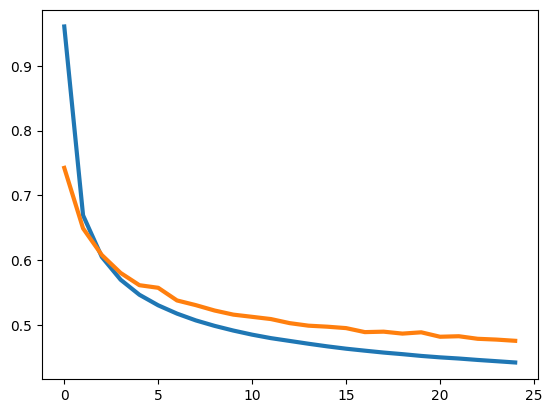

In [ ]:
fig = plt.figure()
plt.plot(range(25),train_loss_history,"-",linewidth=3,label="Train Error")
plt.plot(range(25),test_loss_history,"-",linewidth=3,label="Test Error")
